# TRABAJO SEMANAL 13

> ## Alumno: Fabrizio Hermosa
> ## Materia: Teoría de los circuitos II
> ## Curso: R4001

## <u> Consignas y desarrollo </u>  ##

In [1]:
from IPython.display import IFrame
IFrame("./TS13_TC2_R4001-FabrizioHermosa.pdf", width=900, height=1000)

## <u> Simulaciones numéricas y circuitales </u> ##

Se comprueban los valores de los componentes calculados analíticamente mediante **simulación numérica**.

In [8]:
#Importo librerias de la catedra
import sympy as sp
import numpy as np
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.sintesis_dipolo import cauer_LC, remover_polo_infinito
from pytc2.dibujar import dibujar_cauer_LC
from pytc2.remociones import modsq2mod_s

s = sp.symbols('s', complex=True)

In [9]:
# Función transferencia Ts = S21

S21 = 15/(s**3 + 6*s**2 + 15*s + 15)

S21 = sp.nsimplify(S21)

print_latex(a_equal_b_latex_s('S_{21}(s)', S21))

S11_cuadrado = sp.factor(1 - (S21 * S21.subs(s, -s)))

print_latex(a_equal_b_latex_s('|S_{11}(s)|²', S11_cuadrado))

S11 = modsq2mod_s(S11_cuadrado)

print_latex(a_equal_b_latex_s('S_{11}(s)', S11))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# Impedancia de entrada Z1

Z1 = sp.simplify(sp.expand(sp.simplify(sp.expand(1 + S11))/sp.simplify(sp.expand(1 - S11))))

print_latex(a_equal_b_latex_s('Z_1(s)', Z1))

<IPython.core.display.Math object>

In [19]:
# Remociones parciales en infinito

Z3, L1 = remover_polo_infinito(Z1)

Y5, C1 = remover_polo_infinito(1/Z3)

Z7, L2 = remover_polo_infinito(1/Y5)

L1 = sp.nsimplify(L1)
L2 = sp.nsimplify(L2)
C1 = sp.nsimplify(C1)

print_latex(a_equal_b_latex_s('L_1', L1))

print_latex(a_equal_b_latex_s('L_2', L2))

print_latex(a_equal_b_latex_s('C_1', C1))

# En decimales

print_latex(a_equal_b_latex_s('L_1', L1.n()))

print_latex(a_equal_b_latex_s('L_2', L2.n()))

print_latex(a_equal_b_latex_s('C_1', C1.n()))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Usé la **simulación circuital** para ver las formas de S21 Y S11.

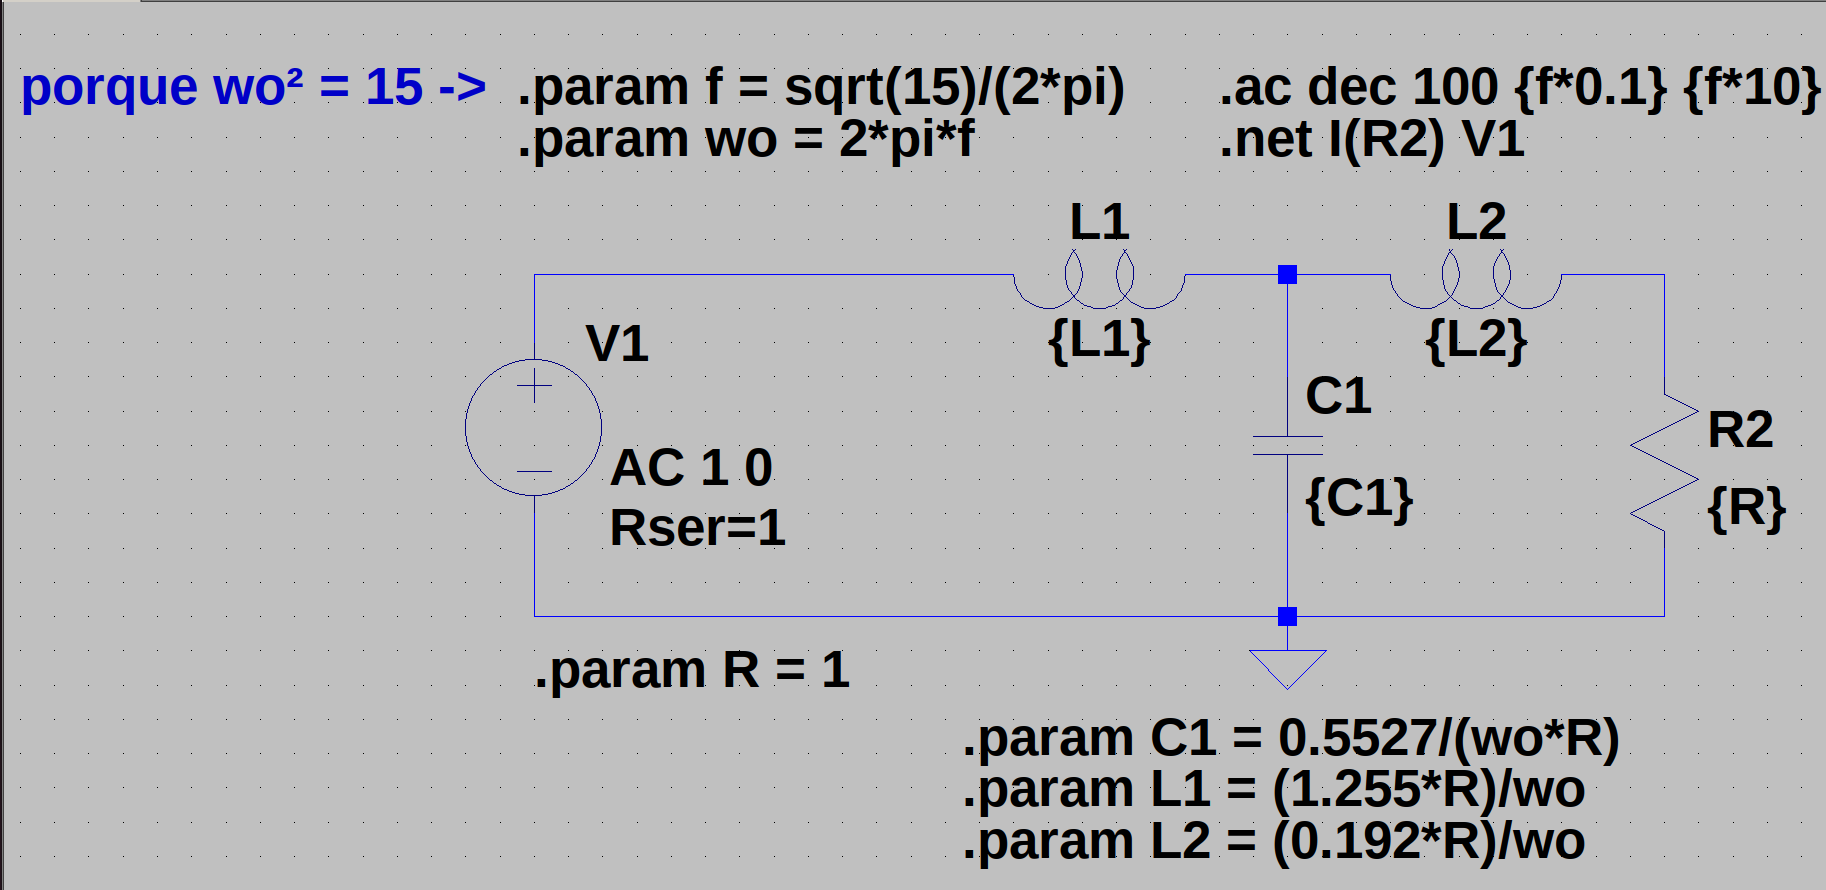

Con todo normalizado, el resultado es muy cercano. La frecuencia de corte unitaria difiere por pocos decimales.

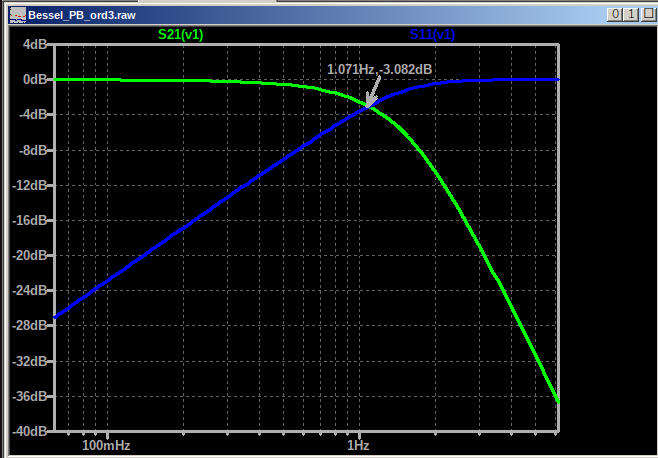

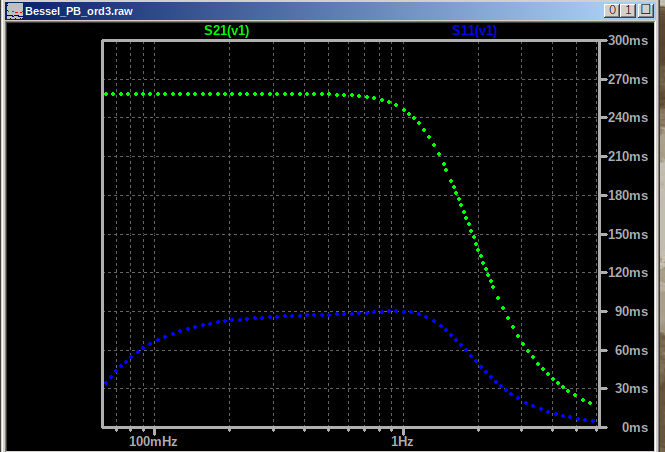

El delay de grupo es el que se espera de un Bessel.

S11 es el complementario de la transferencia original S22, por lo tanto tendrá que ser un pasa altos. Ambos comparten la misma frecuencia de corte.

Se modificaron los valores de algunos parámetros para cumplir con lo pedido en el último ítem.

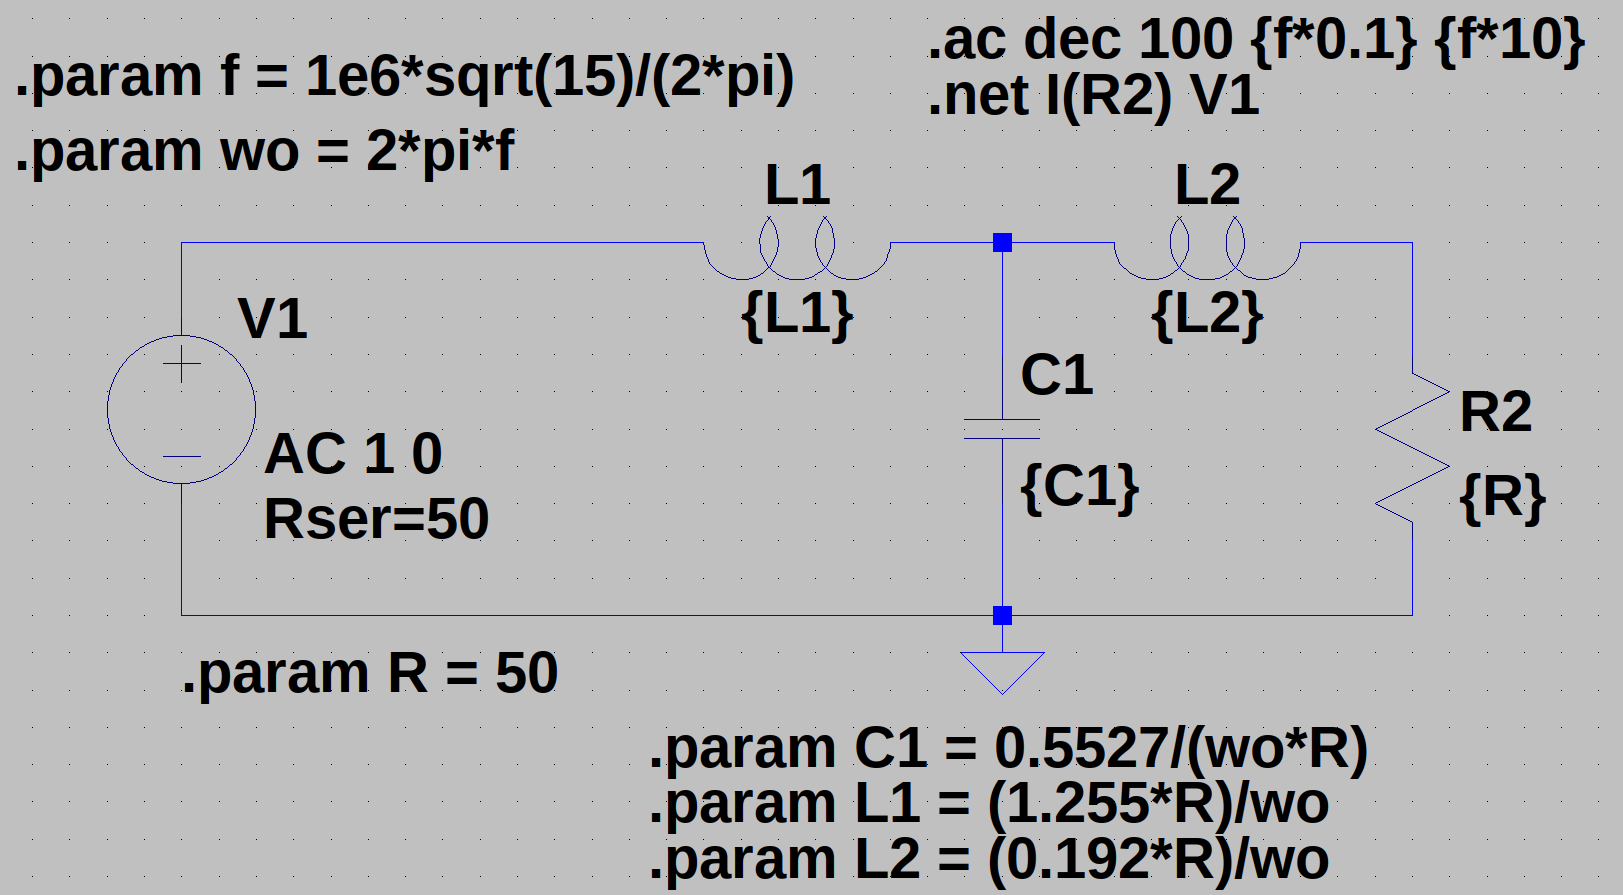

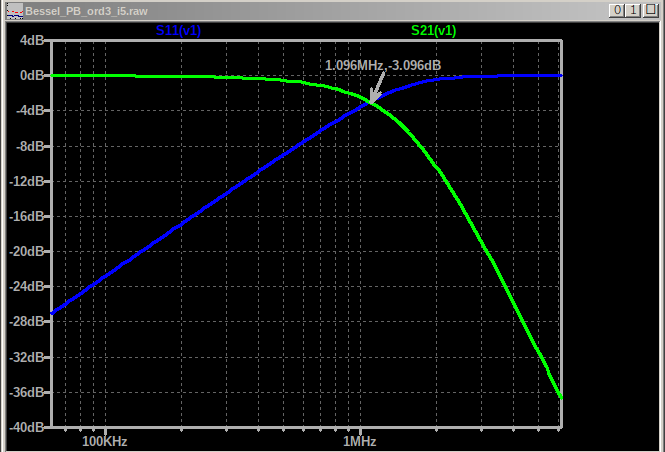

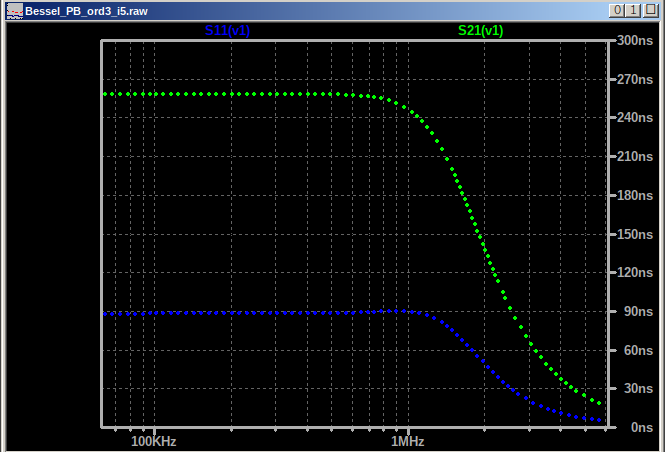

Nuevamente, en el módulo, la frecuencia de corte difiere por muy poco. Sin embargo, el retardo de grupo es correcto.

Es interesante destacar que la constante por la cual se multiplica a la frecuencia sólo logra que la frecuencia de corte sea precisa **para el módulo**. No hay que perder de vista que lo más importante de un Bessel es su retardo de grupo constante hasta ésta frecuencia. Es por eso que en los gráficos anteriores el módulo pudo haber sido preciso mientras que el retardo de grupo ya empezaba a decaer antes de la frecuencia de corte.

Para solucionar eso, simplemente se simuló con una f = 1 y f = 1e6.

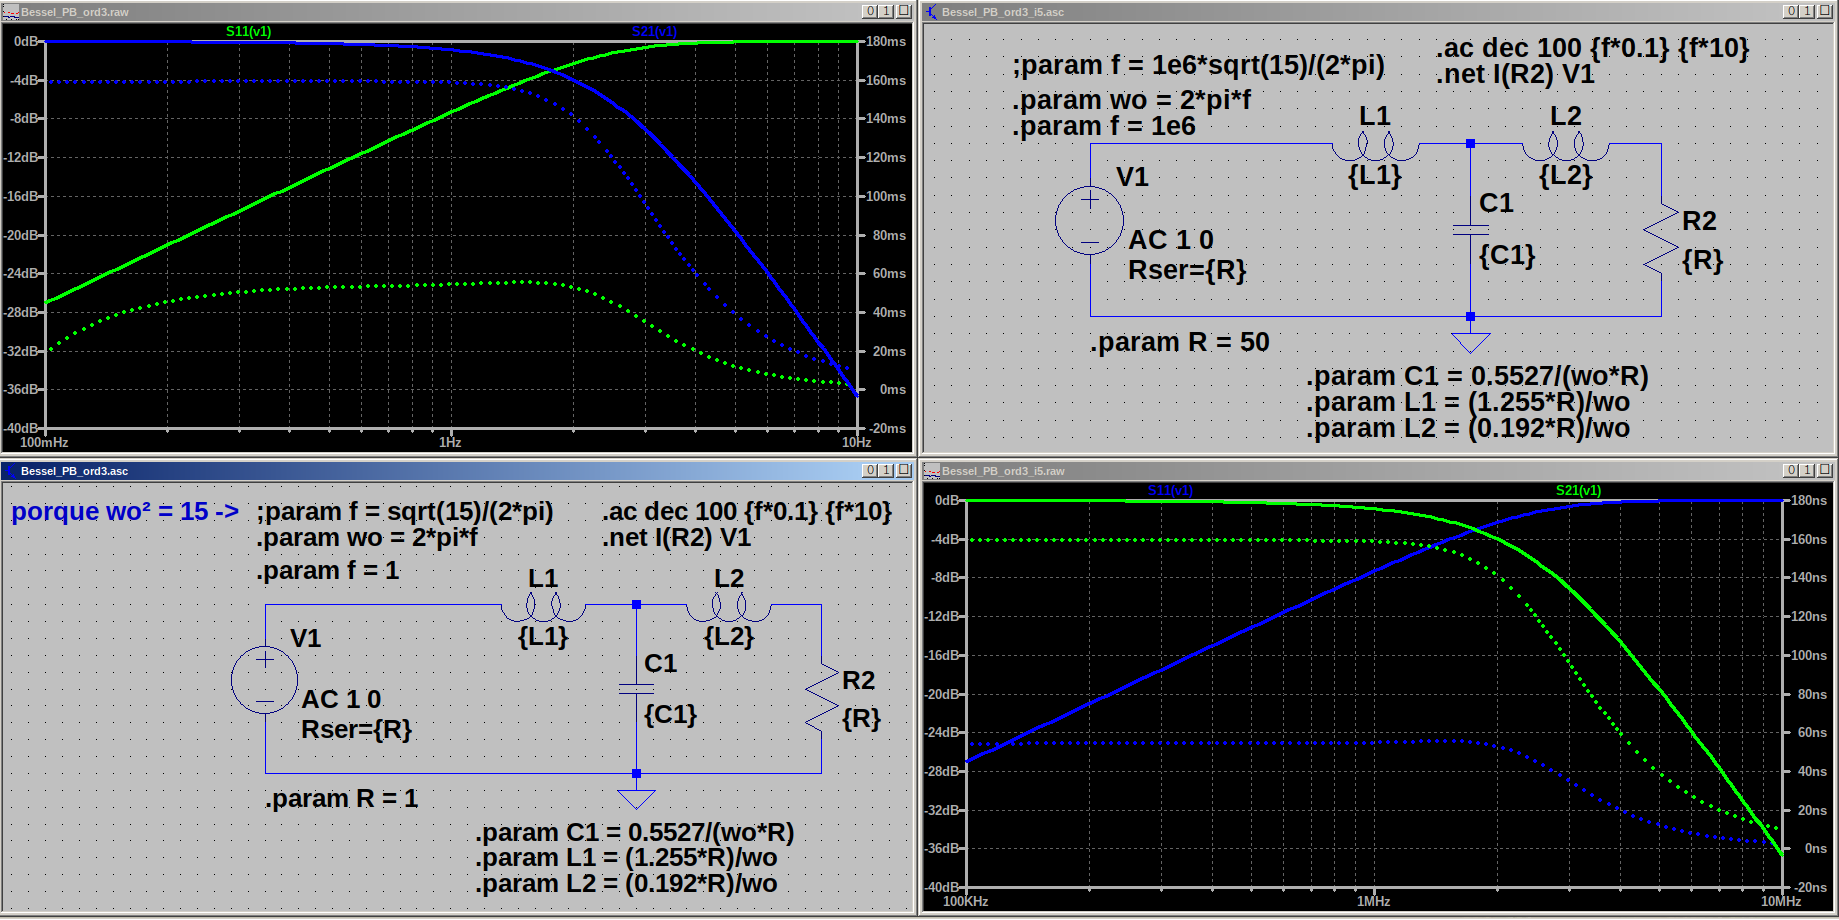

Ahora el delay de grupo sí es constante hasta la frecuencia de corte. La forma del módulo está bien, hay que recordar nuevamente que lo importante de este filtro no es su precisión en el módulo sino su retardo de grupo constante. Por esta razón el anterior análisis pudo haber estado fuera de foco.

En resumen, la simulación circuital y la explicación en un principio se centraba en que la frecuencia de corte del módulo sea precisa antes que la del retardo de grupo. Lo cual puede llegar a tener cierto sentido pero se está ignorando el verdadero uso de un Bessel. Por eso, ésta última simulación corrige ese rumbo. 

Como conclusión, podría decir que se me pasó por alto en el apuro de realizar esta tarea semanal pero por suerte me acordé y tuve que repasar la carpeta para confirmar. Es por eso que es importante saber la naturaleza de cada tipo de filtro y sus distintos comportamientos en frecuencia.